## Research question 3
Does the quality of family relationships, parents' cohabitation status have an impact on alcohol consumption?

selected columns::
[['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']]

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import scikitplot as skplt



from sklearn import set_config
set_config(transform_output = "pandas")

## Function to save figures

In [2]:
from pathlib import Path
IMAGES_PATH = Path() / "images/question 3"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')

In [4]:
X_train.columns

Index(['sex_F', 'sex_M', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A',
       'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'higher_no', 'higher_yes', 'romantic_no',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'avg_grade',
       'alc'],
      dtype='object')

In [5]:
X_train.shape

(892, 43)

In [6]:
# Separate target from dataset
y_train = X_train['alc']
#X_train = X_train.drop(columns = ['alc'])
X_train = X_train [['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']] 
y_test = X_test['alc']
X_test = X_test [['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']]
#X_test = X_test.drop(columns = 'alc')

In [7]:
y_train.value_counts()

1.0    446
0.0    446
Name: alc, dtype: int64

## 0R classifier

In [8]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")



In [9]:
dummy.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [10]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(y_train, dummy.predict(X_train)))
print('Test Accuracy', accuracy_score(y_test, dummy.predict(X_test)))

Train Accuracy 0.5
Test Accuracy 0.6076555023923444


## Hyperparameter Tuning on KNN

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [12]:
param_grid = {
    'n_neighbors' : [5, 10, 25, 50],
    'weights' : ['uniform', 'distance']
}


In [13]:
knn_grid = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_knn.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 25, 50],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [14]:
best_grid_knn = grid_search_knn.best_estimator_

In [15]:
X_test.columns

Index(['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other',
       'famsup_no', 'famsup_yes', 'Medu', 'Fedu'],
      dtype='object')

In [16]:
best_grid_knn

KNeighborsClassifier(n_neighbors=10, weights='distance')

## Applying best estimators in KNN Classifier

[[91 36]
 [20 62]]
Accuracy Score 0.7320574162679426
Classification report:               precision    recall  f1-score   support

         0.0       0.82      0.72      0.76       127
         1.0       0.63      0.76      0.69        82

    accuracy                           0.73       209
   macro avg       0.73      0.74      0.73       209
weighted avg       0.75      0.73      0.73       209



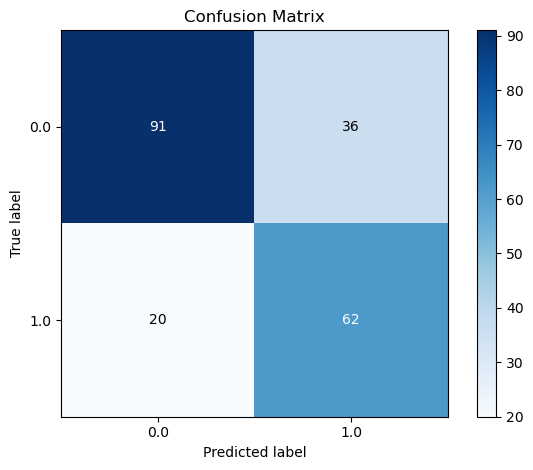

In [17]:
best_grid_knn.fit(X_train, y_train)
y_pred=best_grid_knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for KNN hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Classification Report for Train Set
Accuracy Score 0.9047085201793722
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       446
         1.0       0.92      0.88      0.90       446

    accuracy                           0.90       892
   macro avg       0.91      0.90      0.90       892
weighted avg       0.91      0.90      0.90       892



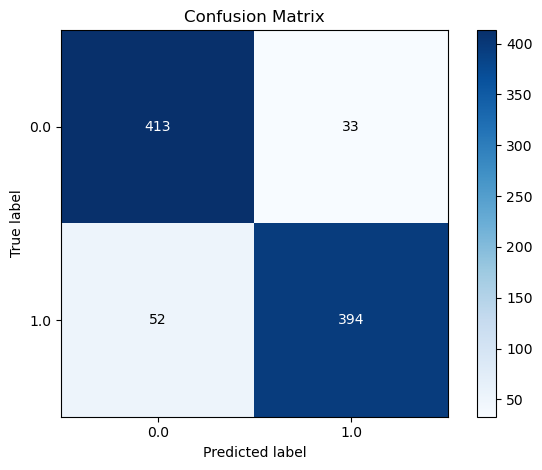

In [18]:
print("Classification Report for Train Set")
print("Accuracy Score {}".format(accuracy_score(y_train, best_grid_knn.predict(X_train).round (3))))
print(classification_report (y_train, best_grid_knn.predict(X_train)))
skplt.metrics.plot_confusion_matrix(y_train, best_grid_knn.predict(X_train));
save_fig('Confusion Matrix train for KNN hyper-para tuned q3')

In [19]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

y_test  y_pred
0       1.0     1.0
1       1.0     1.0
2       1.0     0.0
3       1.0     0.0
4       0.0     0.0
..      ...     ...
204     0.0     1.0
205     0.0     1.0
206     0.0     0.0
207     0.0     1.0
208     0.0     0.0

[209 rows x 2 columns]

## Hyperparameter Tuning on Decision Tree

In [20]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [21]:
param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [5, 10, 15, 30],
}

In [22]:
dt_grid = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_dt.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, 30],
                         'splitter': ['best', 'random']},
             verbose=2)

In [23]:
best_grid_dt = grid_search_dt.best_estimator_
best_grid_dt

DecisionTreeClassifier(max_depth=30)

## Appying best estimators on Decision Tree

[[89 38]
 [17 65]]
Accuracy Score 0.7368421052631579
Classification report: 
              precision    recall  f1-score   support

         0.0       0.84      0.70      0.76       127
         1.0       0.63      0.79      0.70        82

    accuracy                           0.74       209
   macro avg       0.74      0.75      0.73       209
weighted avg       0.76      0.74      0.74       209



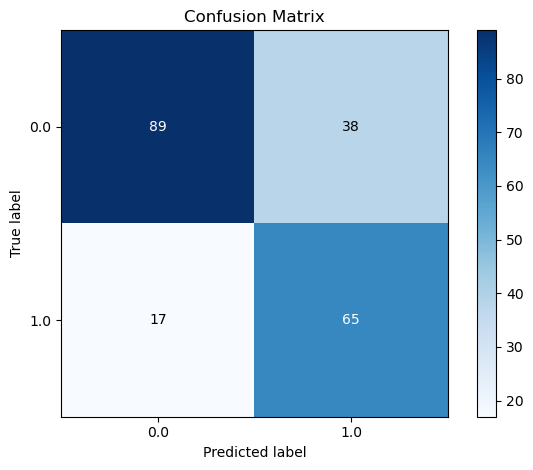

In [24]:
best_grid_dt.fit(X_train, y_train)
y_pred=best_grid_dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Descision_Tree hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

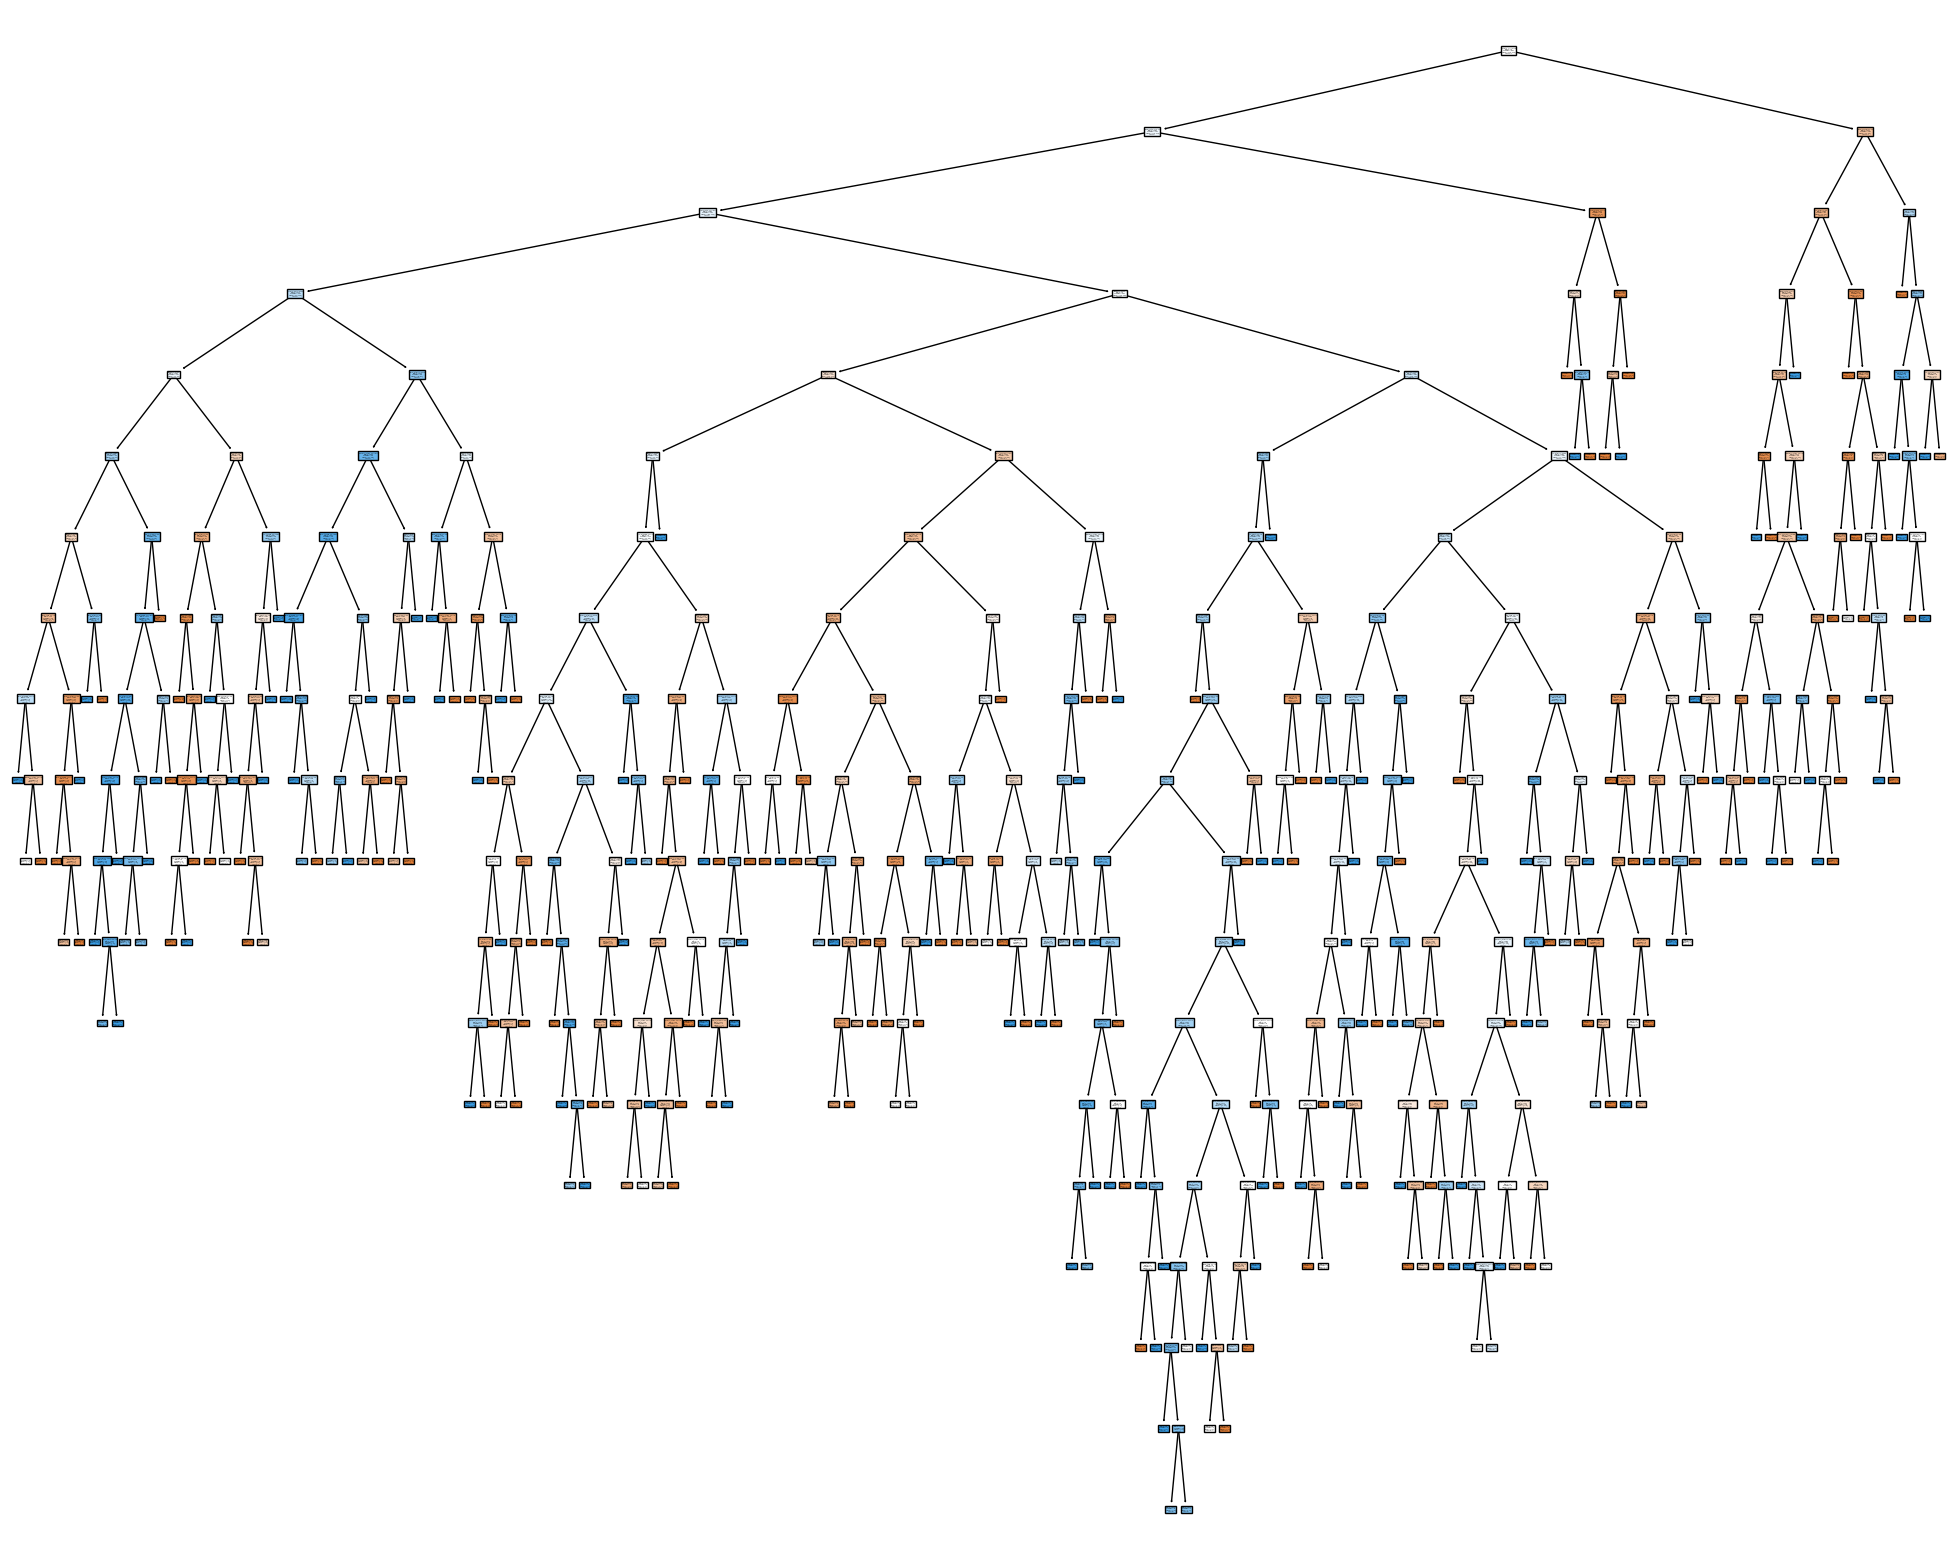

In [25]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_grid_dt, 
                   feature_names=X_train.columns.values.tolist(),  
                   class_names=y_train.name,
                   filled=True)

In [26]:
fig.savefig("decision_tree.png")

Max Depth =  1 , Train Acc. =  0.538 , Test Acc. =  0.383
Max Depth =  2 , Train Acc. =  0.565 , Test Acc. =  0.397
Max Depth =  3 , Train Acc. =  0.567 , Test Acc. =  0.397
Max Depth =  4 , Train Acc. =  0.612 , Test Acc. =  0.56
Max Depth =  5 , Train Acc. =  0.637 , Test Acc. =  0.541
Max Depth =  6 , Train Acc. =  0.679 , Test Acc. =  0.507
Max Depth =  7 , Train Acc. =  0.722 , Test Acc. =  0.569
Max Depth =  8 , Train Acc. =  0.769 , Test Acc. =  0.603
Max Depth =  9 , Train Acc. =  0.797 , Test Acc. =  0.646
Max Depth =  10 , Train Acc. =  0.835 , Test Acc. =  0.699
Max Depth =  11 , Train Acc. =  0.857 , Test Acc. =  0.699
Max Depth =  12 , Train Acc. =  0.872 , Test Acc. =  0.699
Max Depth =  13 , Train Acc. =  0.885 , Test Acc. =  0.722
Max Depth =  14 , Train Acc. =  0.895 , Test Acc. =  0.718
Max Depth =  15 , Train Acc. =  0.9 , Test Acc. =  0.722
Max Depth =  16 , Train Acc. =  0.905 , Test Acc. =  0.727
Max Depth =  17 , Train Acc. =  0.905 , Test Acc. =  0.722
Max Depth

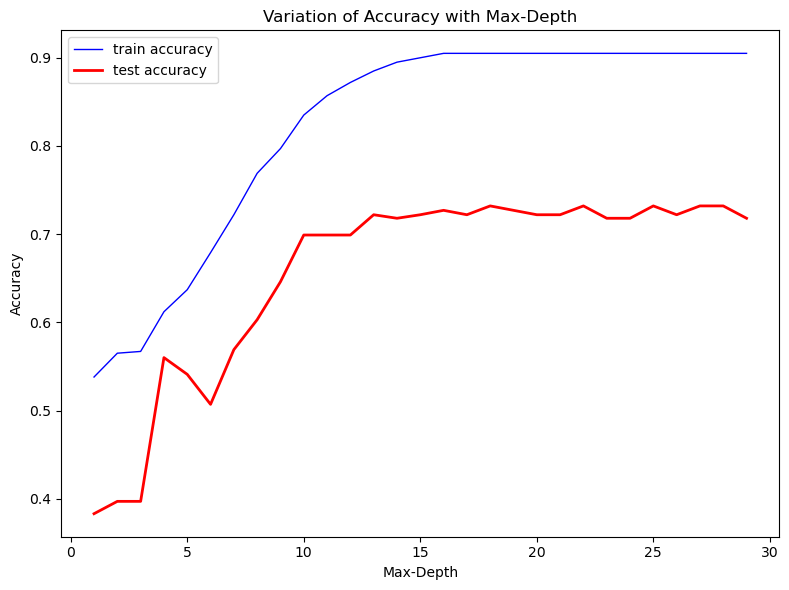

In [27]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

In [28]:
# Confusion matrix for train set
print("Confusion Matrix for Train Set")
pd. DataFrame (confusion_matrix(y_train, best_grid_dt.predict(X_train)))


Confusion Matrix for Train Set


0    1
0  413   33
1   52  394

In [29]:
# Confusion matrix for test set
print("Confusion Matrix for Test Set")
pd. DataFrame (confusion_matrix(y_test, best_grid_dt.predict(X_test)))

Confusion Matrix for Test Set


0   1
0  89  38
1  17  65

In [30]:
print("Classification Report for Train Set")
print(classification_report (y_train, best_grid_dt.predict(X_train).round (3)))

Classification Report for Train Set
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       446
         1.0       0.92      0.88      0.90       446

    accuracy                           0.90       892
   macro avg       0.91      0.90      0.90       892
weighted avg       0.91      0.90      0.90       892



In [31]:
print("Classification Report for Test Set")
print(classification_report(y_test, best_grid_dt.predict (X_test). round(3)))

Classification Report for Test Set
              precision    recall  f1-score   support

         0.0       0.84      0.70      0.76       127
         1.0       0.63      0.79      0.70        82

    accuracy                           0.74       209
   macro avg       0.74      0.75      0.73       209
weighted avg       0.76      0.74      0.74       209



## Hyperparameter Tuning on Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [33]:
param_grid= {
    'n_estimators': [10, 50, 100, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 30, 100],
    'max_features': [None, 'sqrt', 'log2']
}

param_grid= {
    'n_estimators': [10]
}

In [34]:
rf_grid = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 30, 100],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 500]},
             verbose=2)

In [35]:
# Finding out the best estimator
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(criterion='entropy', max_depth=100, n_estimators=50)

## Applying best estimators in Random Forest

In [36]:
best_grid_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, n_estimators=50)

In [37]:
y_pred = best_grid_rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

[[89 38]
 [19 63]]
Accuracy Score 0.7272727272727273
Classification report: 
              precision    recall  f1-score   support

         0.0       0.82      0.70      0.76       127
         1.0       0.62      0.77      0.69        82

    accuracy                           0.73       209
   macro avg       0.72      0.73      0.72       209
weighted avg       0.75      0.73      0.73       209



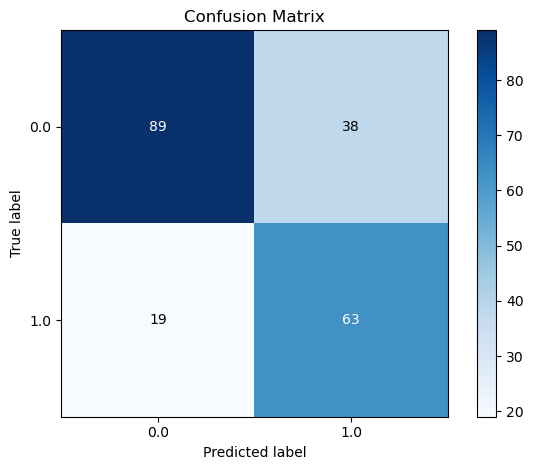

In [38]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Random forest hyper-para tuned q3')

In [41]:
y_pred = best_grid_rf.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

[[398  48]
 [ 38 408]]
Accuracy Score 0.9035874439461884
Classification report: 
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       446
         1.0       0.89      0.91      0.90       446

    accuracy                           0.90       892
   macro avg       0.90      0.90      0.90       892
weighted avg       0.90      0.90      0.90       892



## Hyperparameter Tuning on Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'random_state' : ['42', None],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [44]:
lr_grid = LogisticRegression()
grid_search_lr = GridSearchCV(estimator=lr_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_lr.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.0549e-17): result may not be accurate.
  warnings.warn(
/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are remo

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'random_state': ['42', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             verbose=2)

In [45]:
best_grid_lr = grid_search_lr.best_estimator_
best_grid_lr

LogisticRegression(solver='liblinear')

[[78 49]
 [31 51]]
Accuracy Score 0.6172248803827751
Classification report: 
              precision    recall  f1-score   support

         0.0       0.72      0.61      0.66       127
         1.0       0.51      0.62      0.56        82

    accuracy                           0.62       209
   macro avg       0.61      0.62      0.61       209
weighted avg       0.63      0.62      0.62       209



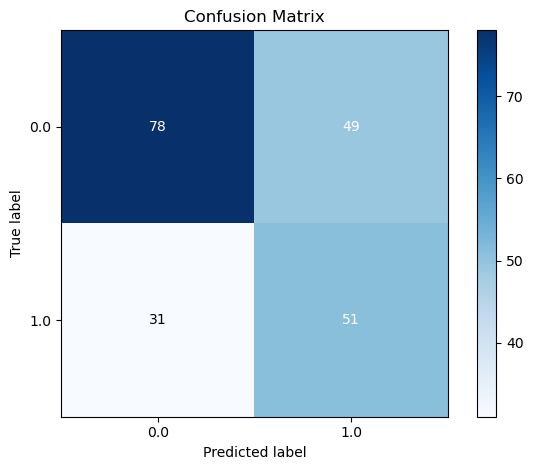

In [46]:
# Applying the best grid for logistic regression
best_grid_lr.fit(X_train, y_train)
y_pred=best_grid_lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Logistic Regression hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on SVM

In [47]:
from sklearn.svm import SVC

In [48]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'random_state' : [42, None],
    'gamma' : ['scale', 'auto'],
    'shrinking' : [True, False],
    'probability' : [True, False],
    'decision_function_shape' : ['ovo', 'ovr'],
    'break_ties' : [True, False]
}

In [49]:
svc_grid = SVC()
grid_search_svc = GridSearchCV(estimator=svc_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_svc.fit(X_train,y_train)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predi

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predi

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'break_ties': [True, False],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'probability': [True, False],
                         'random_state': [42, None],
                         'shrinking': [True, False]},
             verbose=2)

In [50]:
best_grid_svc = grid_search_svc.best_estimator_
best_grid_svc

SVC(break_ties=True, kernel='poly', probability=True, random_state=42)

[[71 56]
 [33 49]]
Accuracy Score 0.5741626794258373
Classification report: 
              precision    recall  f1-score   support

         0.0       0.68      0.56      0.61       127
         1.0       0.47      0.60      0.52        82

    accuracy                           0.57       209
   macro avg       0.57      0.58      0.57       209
weighted avg       0.60      0.57      0.58       209



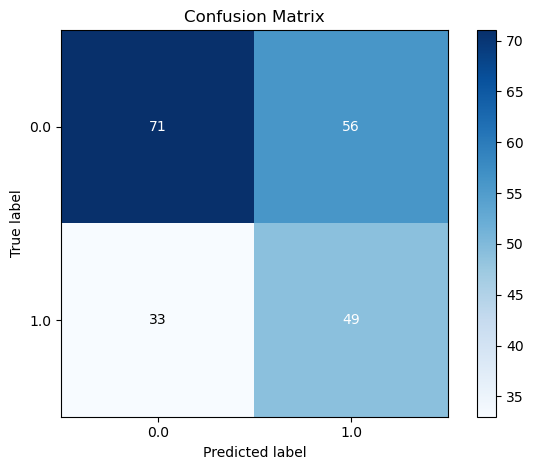

In [51]:
# Applying the best grid for SVC
best_grid_svc.fit(X_train, y_train)
y_pred=best_grid_svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for SVC hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on Multinomial Naive Bayes

In [52]:
from  sklearn.naive_bayes import MultinomialNB

In [53]:
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
    'fit_prior': [True, False]
}

In [54]:
nb_grid = MultinomialNB()
grid_search_nb = GridSearchCV(estimator=nb_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_nb.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
                         'fit_prior': [True, False]},
             verbose=2)

In [55]:
best_grid_nb = grid_search_nb.best_estimator_
best_grid_nb

MultinomialNB(fit_prior=False)

[[78 49]
 [39 43]]
Accuracy Score 0.5789473684210527
Classification report: 
              precision    recall  f1-score   support

         0.0       0.67      0.61      0.64       127
         1.0       0.47      0.52      0.49        82

    accuracy                           0.58       209
   macro avg       0.57      0.57      0.57       209
weighted avg       0.59      0.58      0.58       209



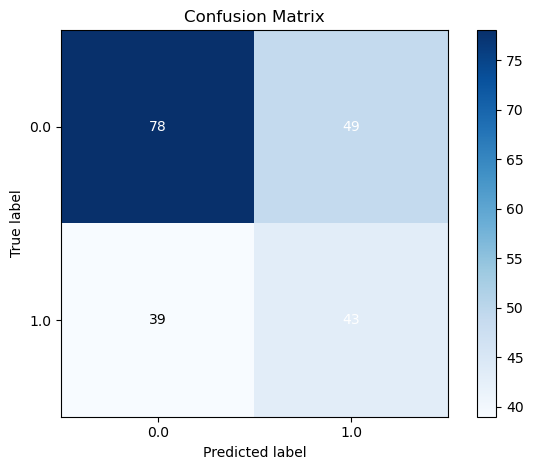

In [56]:
# Applying the best grid for Multinomial Naive Bayes
best_grid_nb.fit(X_train, y_train)
y_pred=best_grid_nb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for MultinomialNB hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Ensemble Learning

In [57]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Hard Voting classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [59]:
#log_clf = LogisticRegression(random_state=42)
#rnd_clf = RandomForestClassifier(random_state=42)
#svm_clf = SVC(random_state=42)
hard_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        ('nb', best_grid_nb)
    ], 
    voting = 'hard'
)
hard_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(n_neighbors=10,
                                                   weights='distance')),
                             ('dt', DecisionTreeClassifier(max_depth=30)),
                             ('lr', LogisticRegression(solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=100,
                                                     n_estimators=50)),
                             ('svc',
                              SVC(break_ties=True, kernel='poly',
                                  probability=True, random_state=42)),
                             ('nb', MultinomialNB(fit_prior=False))])

In [60]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, best_grid_nb, hard_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.7320574162679426
DecisionTreeClassifier 0.722488038277512
LogisticRegression 0.6172248803827751
RandomForestClassifier 0.7320574162679426
SVC 0.5741626794258373
MultinomialNB 0.5789473684210527
VotingClassifier 0.7033492822966507


Accuracy Score 0.7033492822966507
Classification report: 
              precision    recall  f1-score   support

         0.0       0.75      0.77      0.76       127
         1.0       0.63      0.60      0.61        82

    accuracy                           0.70       209
   macro avg       0.69      0.68      0.69       209
weighted avg       0.70      0.70      0.70       209



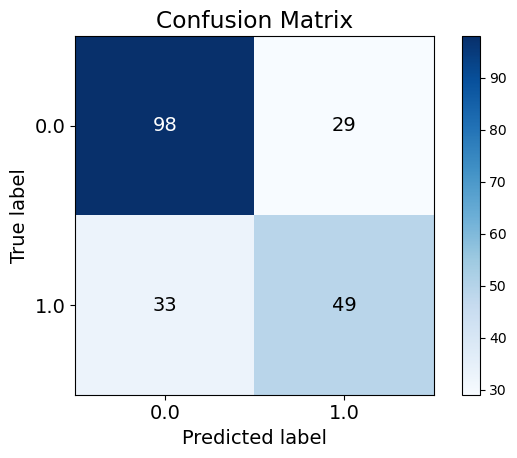

In [61]:
skplt.metrics.plot_confusion_matrix(y_test, hard_voting_clf.predict(X_test));
save_fig('Confusion Matrix for Ensemble Hard Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_test, hard_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, hard_voting_clf.predict(X_test))))

## Soft voting classifier

In [62]:
soft_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        ('nb', best_grid_nb)
    ], 
    voting = 'soft'
)
soft_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(n_neighbors=10,
                                                   weights='distance')),
                             ('dt', DecisionTreeClassifier(max_depth=30)),
                             ('lr', LogisticRegression(solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=100,
                                                     n_estimators=50)),
                             ('svc',
                              SVC(break_ties=True, kernel='poly',
                                  probability=True, random_state=42)),
                             ('nb', MultinomialNB(fit_prior=False))],
                 voting='soft')

In [63]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, best_grid_nb, soft_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.7320574162679426
DecisionTreeClassifier 0.7320574162679426
LogisticRegression 0.6172248803827751
RandomForestClassifier 0.7272727272727273
SVC 0.5741626794258373
MultinomialNB 0.5789473684210527
VotingClassifier 0.7272727272727273


Accuracy Score 0.7272727272727273
Classification report: 
              precision    recall  f1-score   support

         0.0       0.84      0.68      0.75       127
         1.0       0.62      0.80      0.70        82

    accuracy                           0.73       209
   macro avg       0.73      0.74      0.72       209
weighted avg       0.75      0.73      0.73       209



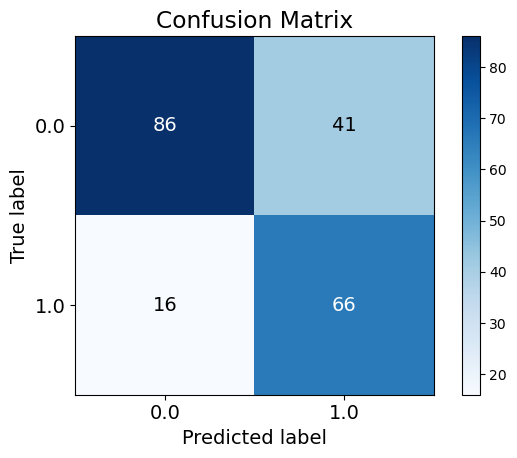

In [64]:
skplt.metrics.plot_confusion_matrix(y_test, soft_voting_clf.predict(X_test));
save_fig('Confusion Matrix for Ensemble Soft Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_test, soft_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, soft_voting_clf.predict(X_test))))

## bagging and pasting

In [65]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

## out of bag evaluation

In [92]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
print('OOB Score', bag_clf.oob_score_)

y_pred = bag_clf.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))
print('Train Accuracy', accuracy_score(y_train, bag_clf.predict(X_train)))

OOB Score 0.7600896860986547
Test Accuracy 0.7416267942583732
Train Accuracy 0.9047085201793722


Accuracy Score 0.7416267942583732
Classification report: 
              precision    recall  f1-score   support

         0.0       0.83      0.72      0.77       127
         1.0       0.64      0.78      0.70        82

    accuracy                           0.74       209
   macro avg       0.74      0.75      0.74       209
weighted avg       0.76      0.74      0.74       209



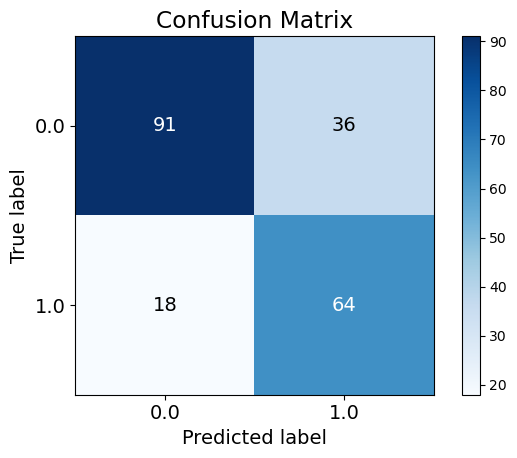

In [67]:
skplt.metrics.plot_confusion_matrix(y_test, bag_clf.predict(X_test));
save_fig('Confusion Matrix for Out of bag q3')
print("Accuracy Score {}".format(accuracy_score(y_test, bag_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, bag_clf.predict(X_test))))

Accuracy Score 0.9047085201793722
Classification report: 
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90       446
         1.0       0.90      0.91      0.90       446

    accuracy                           0.90       892
   macro avg       0.90      0.90      0.90       892
weighted avg       0.90      0.90      0.90       892



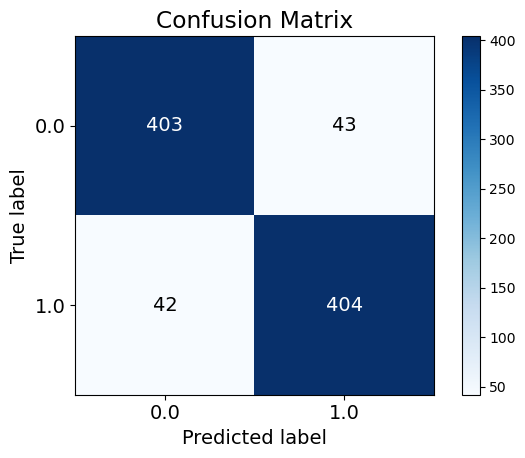

In [93]:
skplt.metrics.plot_confusion_matrix(y_train, bag_clf.predict(X_train));
save_fig('Confusion Matrix train for Out of bag q3')
print("Accuracy Score {}".format(accuracy_score(y_train, bag_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, bag_clf.predict(X_train))))

## impact of no. of estimators

In [68]:
import numpy as np
est = range(50, 500, 50)
train_acc = []
test_acc = []
oob_acc = []
estim = []
out = []
for num_est in est:
    estim.append(num_est)
    rnd_clf = RandomForestClassifier(n_estimators=num_est, oob_score = True, 
                                     max_leaf_nodes=16, n_jobs=-1, 
                                     random_state=42)
    rnd_clf.fit(X_train, y_train)
    y_pred_rf = rnd_clf.predict(X_test)
    train_acc.append(
        accuracy_score(y_train, rnd_clf.predict(X_train)))
    test_acc.append(
        accuracy_score(y_test, rnd_clf.predict(X_test)))
    oob_acc.append(rnd_clf.oob_score_)
i = 0
while i < len(estim):
    print('Num of estimators: ', estim[i], ' train acc = ', train_acc[i],
         ' test acc = ', test_acc[i], 'oob = ', oob_acc[i])
    i = i + 1

Num of estimators:  50  train acc =  0.702914798206278  test acc =  0.5885167464114832 oob =  0.594170403587444
Num of estimators:  100  train acc =  0.7298206278026906  test acc =  0.583732057416268 oob =  0.6053811659192825
Num of estimators:  150  train acc =  0.7197309417040358  test acc =  0.583732057416268 oob =  0.5952914798206278
Num of estimators:  200  train acc =  0.7275784753363229  test acc =  0.6076555023923444 oob =  0.6087443946188341
Num of estimators:  250  train acc =  0.7174887892376681  test acc =  0.6028708133971292 oob =  0.6121076233183856
Num of estimators:  300  train acc =  0.7197309417040358  test acc =  0.6124401913875598 oob =  0.6053811659192825
Num of estimators:  350  train acc =  0.7208520179372198  test acc =  0.6076555023923444 oob =  0.6109865470852018
Num of estimators:  400  train acc =  0.718609865470852  test acc =  0.6124401913875598 oob =  0.6053811659192825
Num of estimators:  450  train acc =  0.7197309417040358  test acc =  0.60765550239234

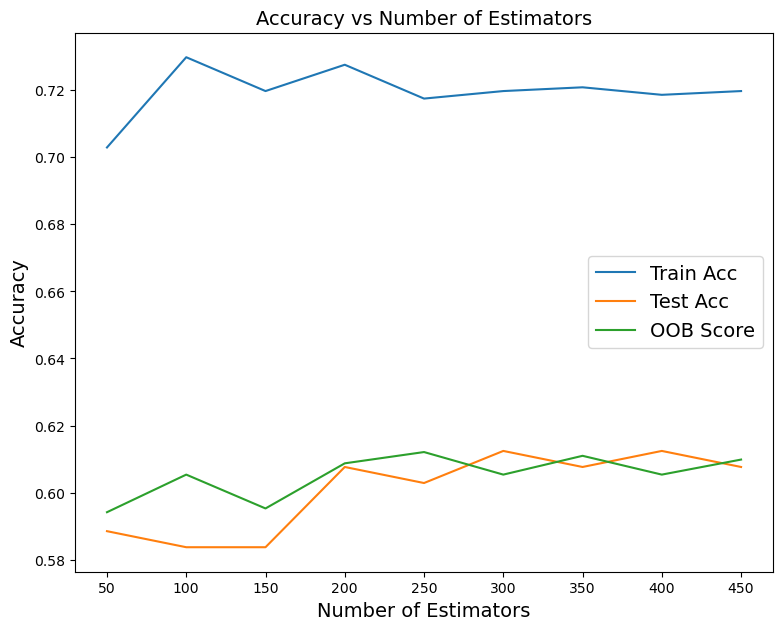

In [69]:
plt.figure(figsize = (9,7))
plt.plot(estim, train_acc, label = 'Train Acc')
plt.plot(estim, test_acc, label = 'Test Acc')
plt.plot(estim, oob_acc, label = 'OOB Score')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## ADA boost classifier

In [70]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6220095693779905

Accuracy Score 0.6220095693779905
Classification report: 
              precision    recall  f1-score   support

         0.0       0.71      0.63      0.67       127
         1.0       0.52      0.61      0.56        82

    accuracy                           0.62       209
   macro avg       0.61      0.62      0.61       209
weighted avg       0.64      0.62      0.63       209



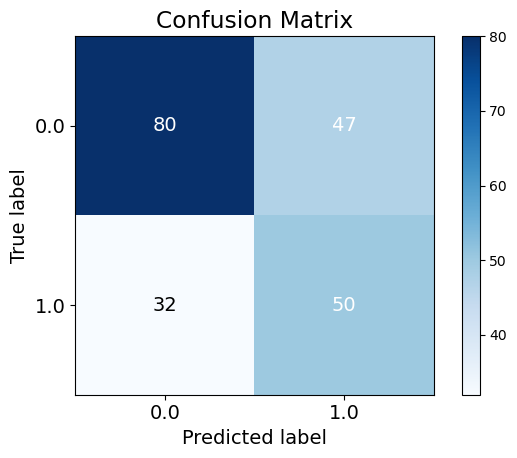

In [71]:
skplt.metrics.plot_confusion_matrix(y_test, ada_clf.predict(X_test));
save_fig('Confusion Matrix for AdaBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_test, ada_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, ada_clf.predict(X_test))))

In [72]:
import numpy as np
est = np.linspace(1, 500, 2)
train_acc = []
test_acc = []
num_learners = []
for estimators in est:
    ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=int(estimators),
    learning_rate=0.5, random_state=42)
    ada_clf.fit(X_train, y_train)
    y_pred_test = ada_clf.predict(X_test)
    y_pred_train = ada_clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
    num_learners.append(estimators)

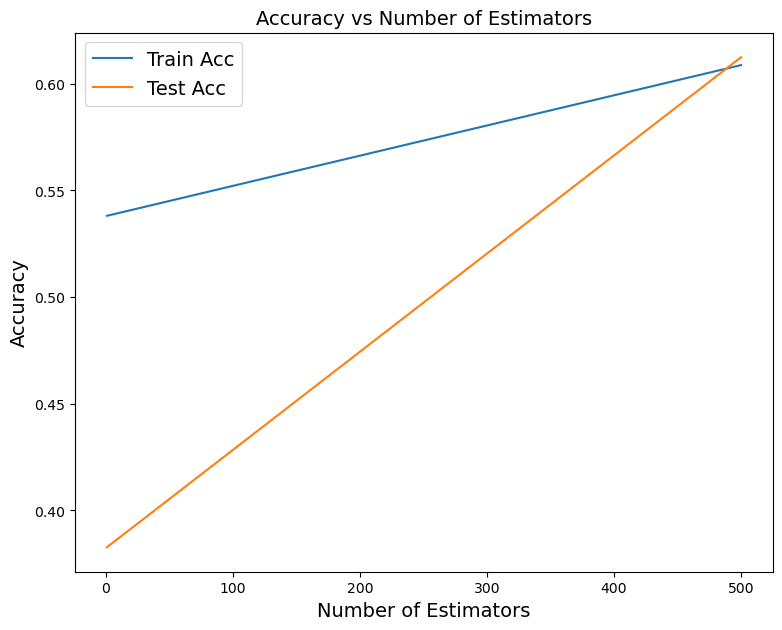

In [73]:
plt.figure(figsize = (9,7))
plt.plot(num_learners, train_acc, label = 'Train Acc')
plt.plot(num_learners, test_acc, label = 'Test Acc')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## XGBoost

In [74]:
import xgboost as xgb

In [75]:
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.7129186602870813

Accuracy Score 0.7129186602870813
Classification report: 
              precision    recall  f1-score   support

         0.0       0.80      0.70      0.75       127
         1.0       0.61      0.73      0.67        82

    accuracy                           0.71       209
   macro avg       0.71      0.72      0.71       209
weighted avg       0.73      0.71      0.72       209



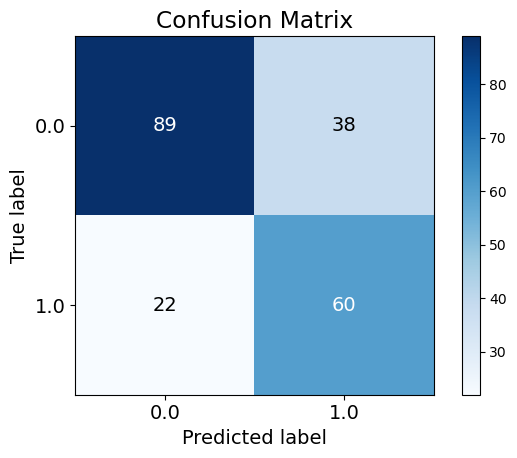

In [76]:
skplt.metrics.plot_confusion_matrix(y_test, xgb_cl.predict(X_test));
save_fig('Confusion Matrix for XGBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_test, xgb_cl.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, xgb_cl.predict(X_test))))

## XAI using LIME

In [77]:
#conda install -c conda-forge ds-lime

In [78]:
from lime.lime_tabular import LimeTabularExplainer

In [79]:
feature_names = X_train.columns.tolist()
#X_train.columns.values.tolist()

In [80]:
# Create a LimeTabularExplainer object
explainer = LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=['low', 'high'])


In [81]:
# Select a specific instance from the testing set for explanation
instance_idx = 0
instance = X_test.values[instance_idx]
true_label = y_test[instance_idx]

In [82]:
# Generate explanations using LIME
#Since our accuracy is the highest for Out of Bag, we will be using OOB to interpret
explanation_lime = explainer.explain_instance(instance, bag_clf.predict_proba, num_features=len(feature_names))


/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.41883e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [83]:
# Print the true label and predicted probabilities
print("True Label:", true_label)
print("Predicted Probabilities:", bag_clf.predict_proba([instance]))



/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


True Label: 1.0
Predicted Probabilities: [[0.18401738 0.81598262]]


In [84]:
# Print the top features and their weights in the LIME explanation
print("LIME Explanation:")
for feature, weight in explanation_lime.as_list():
    print(feature, weight)

LIME Explanation:
Fjob_health <= 0.00 0.25040711733981164
Fjob_other <= 0.00 -0.06259468327418599
Fjob_teacher <= 0.00 0.06052467879441914
Fjob_at_home <= 0.00 0.05646231148112586
Pstatus_A <= 0.00 0.04630131892335766
famsup_no <= 0.00 -0.031078325727603388
Mjob_at_home <= 0.00 0.03068310694832985
0.00 < famsup_yes <= 1.00 -0.022041603893423967
0.00 < Fjob_services <= 1.00 0.021006792855065834
Mjob_services > 0.00 0.0194288312014333
Fedu <= 0.50 0.018729776736046214
Mjob_other <= 0.00 0.01834810923029408
famsize_GT3 <= 0.00 0.015190572405950446
0.00 < famsize_LE3 <= 1.00 0.010974769142564534
guardian_father <= 0.00 0.00974715814006695
Mjob_teacher <= 0.00 -0.009460470612189534
guardian_other <= 0.00 0.007074867099068286
Medu <= 0.50 -0.003052150013605227
0.00 < guardian_mother <= 1.00 -0.0007052349726918416
Mjob_health <= 0.00 -0.0003427551429540412
Pstatus_T <= 1.00 0.0


### Feature Importance Plot

In [85]:
feature_importance = explanation_lime.as_list()


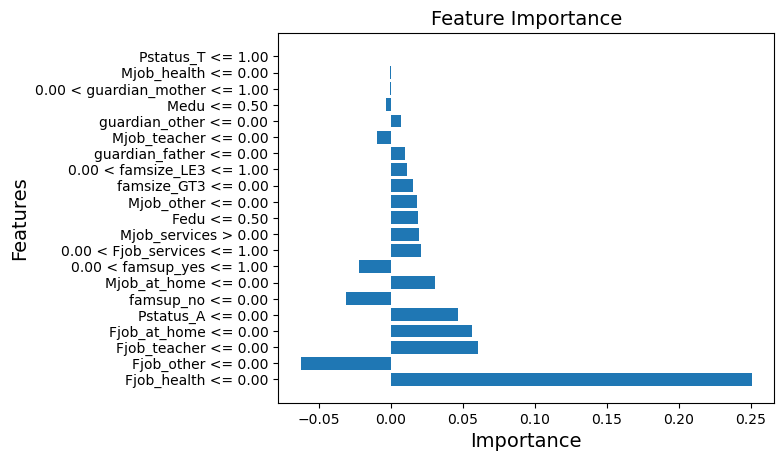

In [86]:
import matplotlib.pyplot as plt

features, values = zip(*feature_importance)
plt.barh(features, values)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.savefig('images/question 3/LIME Feature Importance q3.png')
plt.show()

### LIME Explanation Plot

In [87]:
feature_contributions = explanation_lime.local_exp[1]

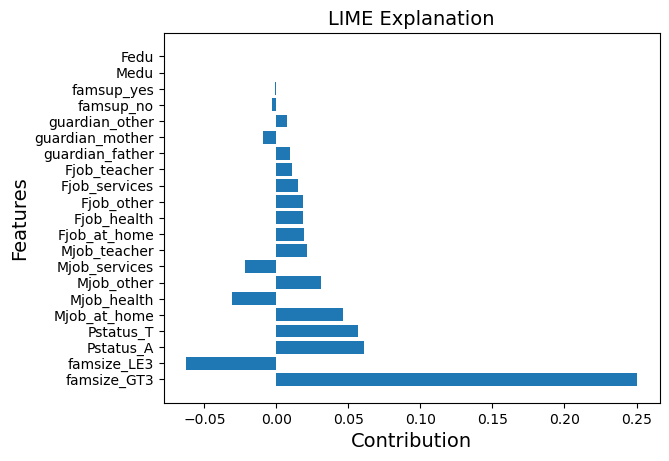

In [88]:
import matplotlib.pyplot as plt

features, contributions = zip(*feature_contributions)
plt.barh(feature_names, contributions)
plt.xlabel('Contribution')
plt.ylabel('Features')
plt.title('LIME Explanation')
plt.savefig('images/question 3/LIME Explanation Graph q3.png')
plt.show()

## Explanation for class 1

In [89]:
import matplotlib.pyplot as plt
print('Predicted: ',bag_clf.predict(X_test)[0])
print('Actual: ', y_test[0])
explanation_lime.show_in_notebook(show_table=True, show_all=False)
explanation_lime.save_to_file('images/question 3/LIME Prediction Probability for class 1 q3.html')

Predicted:  1.0
Actual:  1.0


### Explanation for class 0

In [90]:
#Perform the explanation on the 8th instance in the test data
explaination = explainer.explain_instance(X_test.iloc[8], bag_clf.predict_proba)

# show the result of the model's explaination
print('Predicted: ',bag_clf.predict(X_test)[8])
print('Actual: ', y_test[8])
explaination.show_in_notebook(show_table = True, show_all = False,)
explaination.save_to_file('images/question 3/LIME Prediction Probability for class 0 q3.html')


/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.43394e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Predicted:  0.0
Actual:  0.0


In [91]:
pd.DataFrame({'y_test': y_test, 'y_pred': best_grid_dt.predict(X_test)}).head(10)

y_test  y_pred
0     1.0     1.0
1     1.0     1.0
2     1.0     0.0
3     1.0     0.0
4     0.0     0.0
5     0.0     1.0
6     0.0     0.0
7     1.0     1.0
8     0.0     0.0
9     0.0     1.0

[CV] END ..........penalty=l1, random_state=42, solver=lbfgs; total time=   0.0s
[CV] END penalty=l1, random_state=42, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l1, random_state=42, solver=newton-cholesky; total time=   0.0s
[CV] END ............penalty=l1, random_state=42, solver=sag; total time=   0.0s
[CV] END ...........penalty=l1, random_state=42, solver=saga; total time=   0.0s
[CV] END ...........penalty=l1, random_state=42, solver=saga; total time=   0.0s
[CV] END ...........penalty=l1, random_state=42, solver=saga; total time=   0.0s
[CV] END ...........penalty=l1, random_state=42, solver=saga; total time=   0.0s
[CV] END ....penalty=l1, random_state=None, solver=liblinear; total time=   0.0s
[CV] END ....penalty=l1, random_state=None, solver=liblinear; total time=   0.0s
[CV] END ...........penalty=l2, random_state=42, solver=saga; total time=   0.0s
[CV] END ...........penalty=l2, random_state=42, solver=saga; total time=   0.0s
[CV] END ...........penalty=

[CV] END ..........penalty=l1, random_state=42, solver=lbfgs; total time=   0.0s
[CV] END penalty=l1, random_state=42, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l1, random_state=42, solver=newton-cholesky; total time=   0.0s
[CV] END ........penalty=l1, random_state=None, solver=lbfgs; total time=   0.0s
[CV] END ........penalty=l1, random_state=None, solver=lbfgs; total time=   0.0s
[CV] END ........penalty=l1, random_state=None, solver=lbfgs; total time=   0.0s
[CV] END ........penalty=l1, random_state=None, solver=lbfgs; total time=   0.0s
[CV] END ....penalty=l1, random_state=None, solver=liblinear; total time=   0.0s
[CV] END ....penalty=l1, random_state=None, solver=liblinear; total time=   0.0s
[CV] END penalty=l1, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l1, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l1, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l1, r

[CV] END ..........penalty=l1, random_state=42, solver=lbfgs; total time=   0.0s
[CV] END ......penalty=l1, random_state=42, solver=newton-cg; total time=   0.0s
[CV] END ......penalty=l1, random_state=42, solver=newton-cg; total time=   0.0s
[CV] END ............penalty=l1, random_state=42, solver=sag; total time=   0.0s
[CV] END ............penalty=l1, random_state=42, solver=sag; total time=   0.0s
[CV] END ............penalty=l1, random_state=42, solver=sag; total time=   0.0s
[CV] END ...........penalty=l1, random_state=42, solver=saga; total time=   0.0s
[CV] END ...........penalty=l1, random_state=42, solver=saga; total time=   0.0s
[CV] END ........penalty=l1, random_state=None, solver=lbfgs; total time=   0.0s
[CV] END ........penalty=l1, random_state=None, solver=lbfgs; total time=   0.0s
[CV] END ........penalty=l1, random_state=None, solver=lbfgs; total time=   0.0s
[CV] END ........penalty=l1, random_state=None, solver=lbfgs; total time=   0.0s
[CV] END ....penalty=l1, ran

[CV] END ..........penalty=l1, random_state=42, solver=lbfgs; total time=   0.0s
[CV] END ......penalty=l1, random_state=42, solver=liblinear; total time=   0.0s
[CV] END ......penalty=l1, random_state=42, solver=liblinear; total time=   0.0s
[CV] END ......penalty=l1, random_state=42, solver=newton-cg; total time=   0.0s
[CV] END ......penalty=l1, random_state=42, solver=newton-cg; total time=   0.0s
[CV] END ............penalty=l1, random_state=42, solver=sag; total time=   0.0s
[CV] END ............penalty=l1, random_state=42, solver=sag; total time=   0.0s
[CV] END ............penalty=l1, random_state=42, solver=sag; total time=   0.0s
[CV] END ....penalty=l1, random_state=None, solver=newton-cg; total time=   0.0s
[CV] END ....penalty=l1, random_state=None, solver=newton-cg; total time=   0.0s
[CV] END ....penalty=l1, random_state=None, solver=newton-cg; total time=   0.0s
[CV] END ....penalty=l1, random_state=None, solver=newton-cg; total time=   0.0s
[CV] END ....penalty=l1, ran

[CV] END ..........penalty=l1, random_state=42, solver=lbfgs; total time=   0.0s
[CV] END ..........penalty=l1, random_state=42, solver=lbfgs; total time=   0.0s
[CV] END ......penalty=l1, random_state=42, solver=liblinear; total time=   0.0s
[CV] END ......penalty=l1, random_state=42, solver=liblinear; total time=   0.0s
[CV] END ......penalty=l1, random_state=42, solver=liblinear; total time=   0.0s
[CV] END ......penalty=l1, random_state=42, solver=liblinear; total time=   0.0s
[CV] END penalty=l1, random_state=42, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l1, random_state=42, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l1, random_state=42, solver=newton-cholesky; total time=   0.0s
[CV] END ............penalty=l1, random_state=42, solver=sag; total time=   0.0s
[CV] END ....penalty=l2, random_state=None, solver=newton-cg; total time=   0.0s
[CV] END ....penalty=l2, random_state=None, solver=newton-cg; total time=   0.0s
[CV] END penalty=l2, random_